# Predicting heart disease using machine learning

This notebook will try to use various Python-based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

Given clinical parameters about patients, can we predict whether or not they have heart disease?

## 2. Data

The original data came from: https://archive.ics.uci.edu/ml/datasets/heart+Disease
A version of it available on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

Goal: 95% of accuracy of predicting whether a patient has heart disease.

## 4. Features

### Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0:Typical angina: chest pain related decrease blood supply to the heart
   * 1:Atypical angina: chest pain not related to heart
   * 2:Non-anginal pain: typically esophageal spasms (non heart related)
   * 3:Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
   * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
      * can range from mild symptoms to severe problems
      * signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy
      * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
   
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools

We are going to use Pandas, Matplotlib, NumPy for data analysis and manipulation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline



### Load Data

In [3]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### data exploration (Exploratory data analysis or EDA)

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

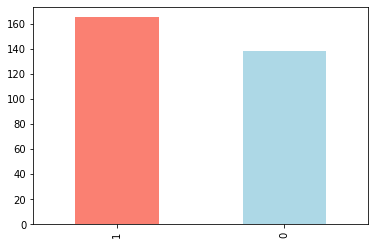

In [7]:
df.target.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# heart disease frequency according to Sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


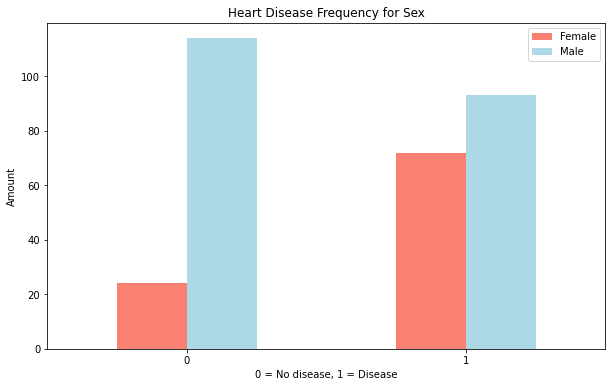

In [12]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize =(10,6),  color = ['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

In [13]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [14]:
#age vs Max Heart Rate for Heart Disease
pd.crosstab(df.thalach, df.sex)

sex,0,1
thalach,,
71,0,1
88,0,1
90,0,1
95,0,1
96,1,1
...,...,...
190,0,1
192,1,0
194,0,1


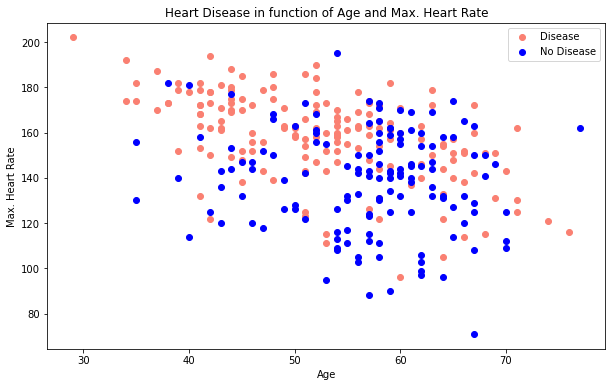

In [15]:
plt.figure(figsize = (10,6))

#Scatter with positive examples
plt.scatter(df.age[df['target']==1],
            df.thalach[df['target']==1],
           color = 'salmon')

#Scatter with negative examples
plt.scatter(df.age[df['target']==0],
            df.thalach[df['target']==0],
           color = 'blue')

plt.title('Heart Disease in function of Age and Max. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max. Heart Rate');
plt.legend(['Disease', 'No Disease'])


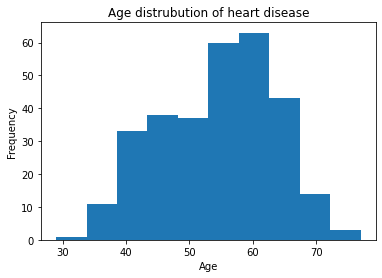

In [16]:
# age distrubution of heart disease

df.age.plot(kind = 'hist')
plt.title('Age distrubution of heart disease')
plt.xlabel('Age');

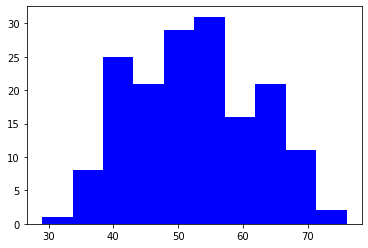

In [17]:
plt.hist(df.age[df['target']==1],
           color = 'blue', );

### Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type
   * 0:Typical angina: chest pain related decrease blood supply to the heart
   * 1:Atypical angina: chest pain not related to heart
   * 2:Non-anginal pain: typically esophageal spasms (non heart related)
   * 3:Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Figure size 720x432 with 0 Axes>

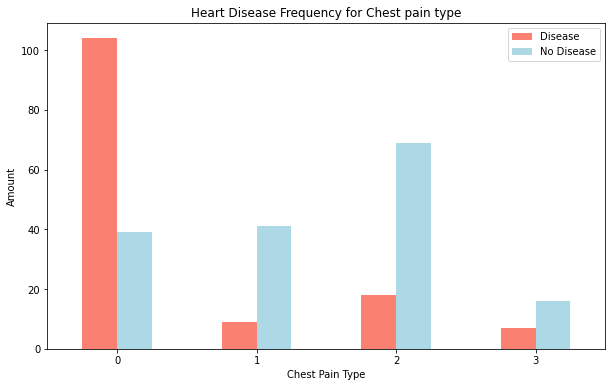

In [19]:
plt.figure(figsize = (10,6))

pd.crosstab(df.cp, df.target).plot(kind='bar', figsize =(10,6),  color = ['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for Chest pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['Disease', 'No Disease'])
plt.xticks(rotation = 0);



In [20]:
#correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


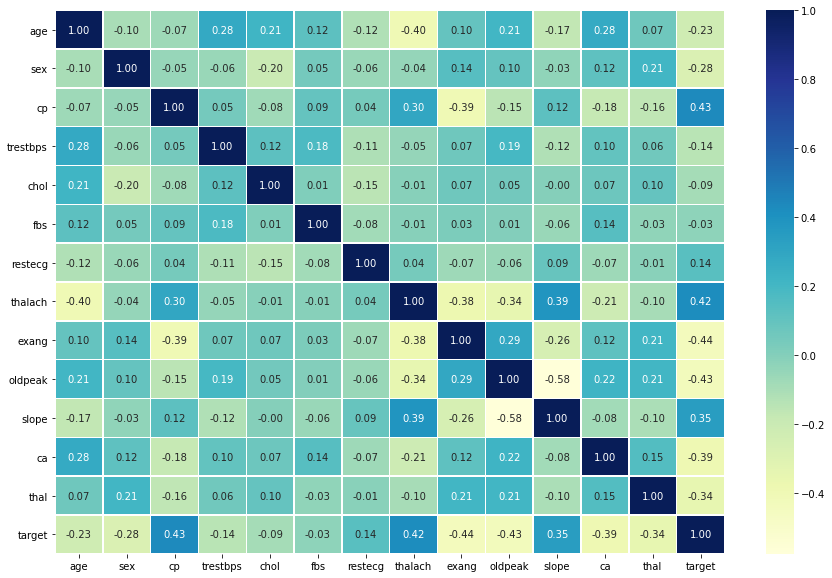

In [21]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths=0.5, fmt = '0.2f', cmap = 'YlGnBu')

## 5. Modelling

In [22]:
# split the data into X and y
X= df.drop('target', axis =1)
y= df['target']

np.random.seed(42)

#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


try three different machine learning model (Logistic Regression, KNeighbors Classifier, RandomForestClassifer)

In [23]:
models = {'Logistic Regression': LogisticRegression(),
          'KNeighbors Classifier': KNeighborsClassifier(),
          'RandomForestClassifer': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate the given machine learning models
    models: different Scikit-Learn models
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores




In [24]:
model_scores = fit_and_score(models = models,X_train= X_train,X_test= X_test, y_train= y_train, y_test=y_test)
model_scores

/Users/kitlamlin97/Desktop/MLProject/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNeighbors Classifier': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

### Model Comparison

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNeighbors Classifier'),
  Text(2, 0, 'RandomForestClassifer')])

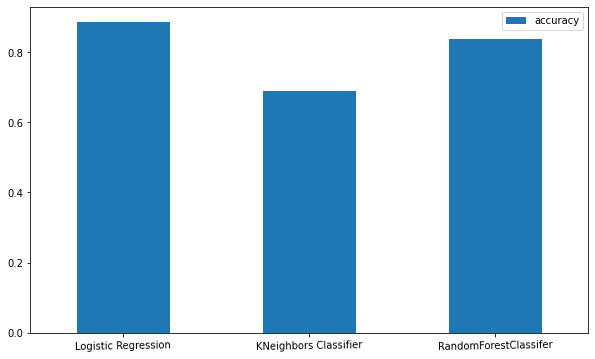

In [25]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot(kind = 'bar',figsize = (10,6))
plt.xticks(rotation=True)

### What to do next?
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* recall
* f1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [26]:
train_score = []
test_score = []

# create a list of different values for n_neighbors
neighbors = np.arange(1,20,1)

KNN= KNeighborsClassifier()
for i in neighbors:
    KNN.set_params(n_neighbors=i)
    
    KNN.fit(X_train, y_train)
    
    train_score.append(KNN.score(X_train, y_train))
    
    test_score.append(KNN.score(X_test, y_test))
    
    

In [27]:
max(train_score),max(test_score)

(1.0, 0.7540983606557377)

Maximum KNN score on the test data: 75.41%


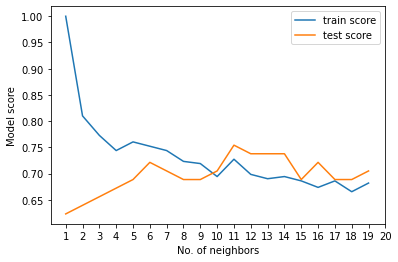

In [28]:
plt.plot(neighbors, train_score, label = 'Train score')
plt.plot(neighbors, test_score, label = 'Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('No. of neighbors')
plt.ylabel('Model score');
plt.legend(['train score', 'test score'])

print(f'Maximum KNN score on the test data: {max(test_score)*100:.2f}%')

### Hyperparameters tuning with RandomizedSearchCV

We are going to tune LogisticRegression() and RandomForestClassifier() using RandomizedSearchCV

In [29]:
# hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver':['liblinear']}

# hyperparameter grid for Random Forest Classifier
rf_clf_grid = {'n_estimators': np.arange(10,1000,50),
               'max_depth': [None,3,5,10],
               'min_samples_split': np.arange(2,20,2),
               'min_samples_leaf': np.arange(1,20,2)}

In [51]:
# tune Logistic Regression
np.random.seed(42)
log_reg_rs = RandomizedSearchCV(estimator = LogisticRegression(),
                            param_distributions=log_reg_grid,
                            cv = 5,
                            n_iter=20,
                            verbose = 2)
log_reg_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .

[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=1438.44988828766 ............................
[CV] ............. solver=liblinear, C=1438.44988828766, total=   0.0s
[CV] solver=liblinear, C=3792.690190732246 ...........................
[CV] ............ solver=liblinear, C=3792.690190732246, total=   0.0s
[CV] solver=liblinear, C=3792.690190732246 ...........................
[CV] ............ solver=liblinear, C=3792.690190732246, total=   0.0s
[CV] solver=liblinear, C=3792.690190732246 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [52]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
log_reg_rs.score(X_test,y_test)

0.8852459016393442

In [54]:
# tune Random Forest Classifier
np.random.seed(42)

rf_clf_rs = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_clf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=2)

In [55]:
rf_clf_rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.8s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.8s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5, total=   0.5s
[CV] n_estimators=310, min_samples_split=2,

[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.5s
[CV] n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.5s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.4s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.4s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.4s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.4s
[CV] n_estimators=910, min_samples_split=18,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [56]:
rf_clf_rs.score(X_test,y_test)

0.8688524590163934

In [57]:
rf_clf_rs.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [58]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNeighbors Classifier': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

### Hyperparameters tuning using GridSearchCV

In [65]:
# hyperparameter grid for Logistic Regression
log_reg_gs_grid = {'C': np.logspace(-4,3,20),
                   'solver':['liblinear']}


In [66]:
np.random.seed(42)
log_reg_gs = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_gs_grid,
                          cv=5,
                          verbose= True)

In [67]:
log_reg_gs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.33572147e-04, 5.45559478e-04, 1.27427499e-03,
       2.97635144e-03, 6.95192796e-03, 1.62377674e-02, 3.79269019e-02,
       8.85866790e-02, 2.06913808e-01, 4.83293024e-01, 1.12883789e+00,
       2.63665090e+00, 6.15848211e+00, 1.43844989e+01, 3.35981829e+01,
       7.84759970e+01, 1.83298071e+02, 4.28133240e+02, 1.00000000e+03]),
                         'solver': ['liblinear']},
             verbose=True)

In [68]:
log_reg_gs.best_params_

{'C': 0.2069138081114788, 'solver': 'liblinear'}

In [69]:
log_reg_gs.score(X_train, y_train)

0.859504132231405

In [70]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNeighbors Classifier': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

## Evaluate the tuned machine learning classifier

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

In [72]:
log_reg_rs.score(X_test,y_test)

0.8852459016393442

In [100]:
# make prediction with tuned model
y_preds = log_reg_rs.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

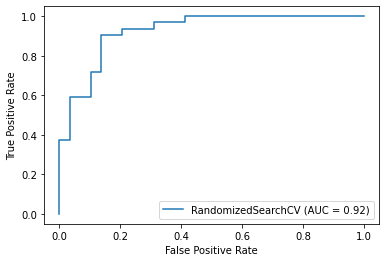

In [101]:
# ROC curve
plot_roc_curve(log_reg_rs, X_test,y_test );

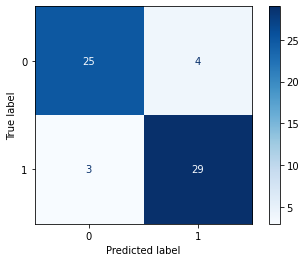

In [102]:
# Confusion Matric
plot_confusion_matrix(log_reg_rs, X_test,y_test,cmap='Blues')

In [103]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [104]:
log_reg_rs.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [105]:
log_reg_best = LogisticRegression(C=0.23357214690901212,
                                  solver = 'liblinear')

In [106]:
log_reg_best.fit(X_train, y_train)
log_reg_best.score(X_test, y_test)

0.8852459016393442

In [125]:
accuracy = cross_val_score(log_reg_best,
                            X, 
                            y, 
                            cv=5,
                            scoring='accuracy')
accuracy = np.mean(accuracy)

In [126]:
precision = cross_val_score(log_reg_best,
                            X, 
                            y, 
                            cv=5,
                            scoring='precision')
precision = np.mean(precision)

In [127]:
recall = cross_val_score(log_reg_best,
                         X, 
                         y, 
                         cv=5,
                         scoring='recall')
recall = np.mean(recall)

In [128]:
f1 = cross_val_score(log_reg_best,
                     X, 
                     y, 
                     cv=5,
                     scoring='f1')
f1= np.mean(f1)

In [134]:
cv_metrics= pd.DataFrame({'accuracy': accuracy,
             'precision':precision,
             'recall': recall,
             'f1': f1},
             index =[0])

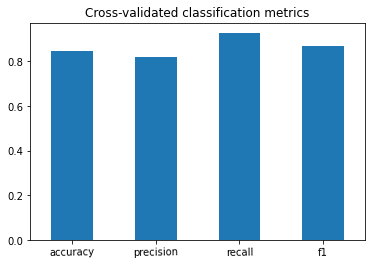

In [140]:
cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics', legend =False)
plt.xticks(rotation = True);

# Feature Importance

Which features contributed most to the outcomes of the model and how did they contribute?

In [145]:
log_reg_best = LogisticRegression(C=0.23357214690901212,
                                  solver = 'liblinear')
log_reg_best.fit(X_train, y_train);


In [146]:
log_reg_best.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [149]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [150]:
feature_dict = dict(zip(df.columns, list(log_reg_best.coef_[0])))
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

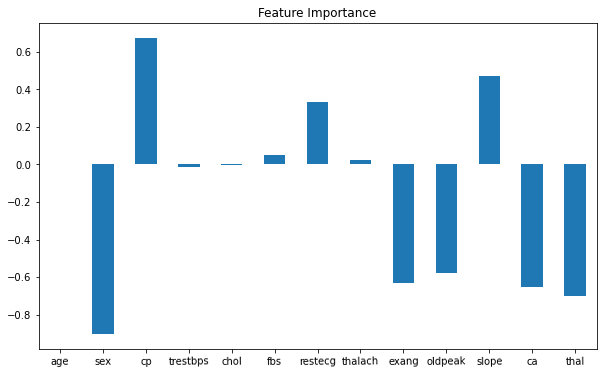

In [158]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot(kind='bar',title = 'Feature Importance', legend=False, figsize= (10 ,6))
plt.xticks(rotation= True);

## 6. Experimentation

If we haven't hit the evaluation metric yet, what can we do?

* Could we collect more data?
* Could try a better model? CatBoost or XGBoost?
* Could we improve the current model?
